#### Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### EDA

In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- There are no missing values in the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
print("\nNew column names:")
print(df.columns)


New column names:
Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading more higher = 17

In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding columns for "Total Score" and "Average"

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = np.round(df['total_score']/3, 3)
df.drop('total_score', axis=1, inplace=True)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.667
1,female,group C,some college,standard,completed,69,90,88,82.333
2,female,group B,master's degree,standard,none,90,95,93,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333
4,male,group C,some college,standard,none,76,78,75,76.333


In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1



- From above values we get students have performed the worst in Maths
- Best performance is in reading section

#### Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

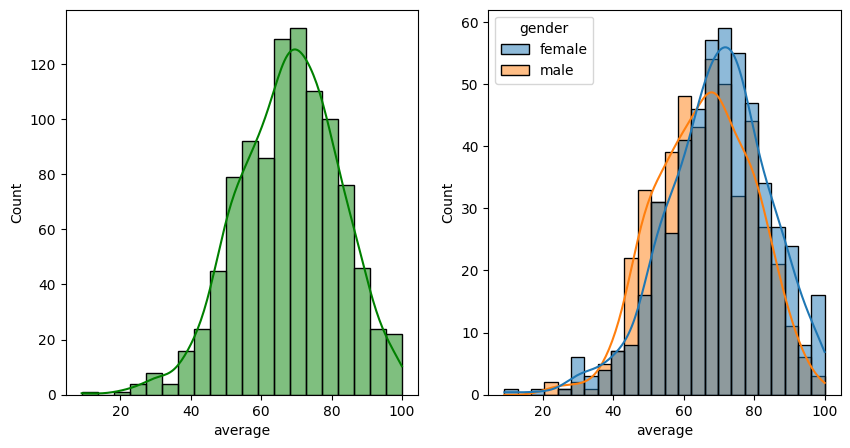

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df,x='average',bins=20,kde=True,color='g', ax=axs[0])

sns.histplot(data=df,x='average',kde=True,hue='gender', ax=axs[1])

ValueError: Could not interpret value `total_score` for `x`. An entry with this name does not appear in `data`.

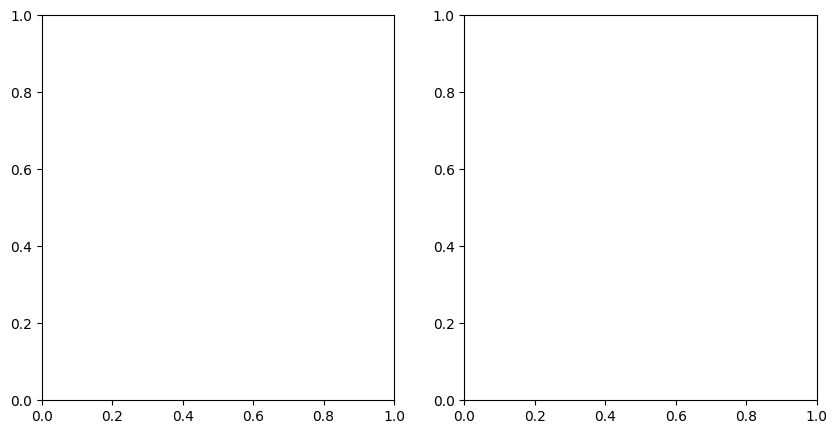

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df,x='total_score',bins=20,kde=True,color='violet', ax=axs[0])

sns.histplot(data=df,x='total_score',kde=True,hue='gender', ax=axs[1])

- Female students tend to perform well then male students.

<Axes: xlabel='average', ylabel='Count'>

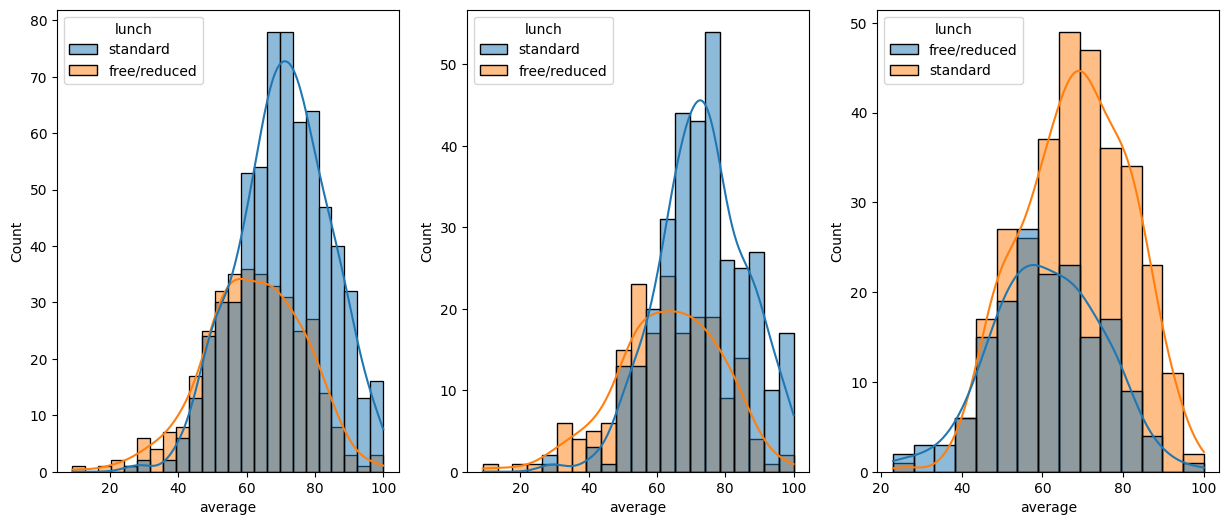

In [ ]:
_, axs = plt.subplots(1,3, figsize=(15,6))

sns.histplot(data=df,x='average',kde=True,hue='lunch', ax=axs[0])
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', ax=axs[1])
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', ax=axs[2])

- Standard lunch helps perform well in exams be it a male or a female

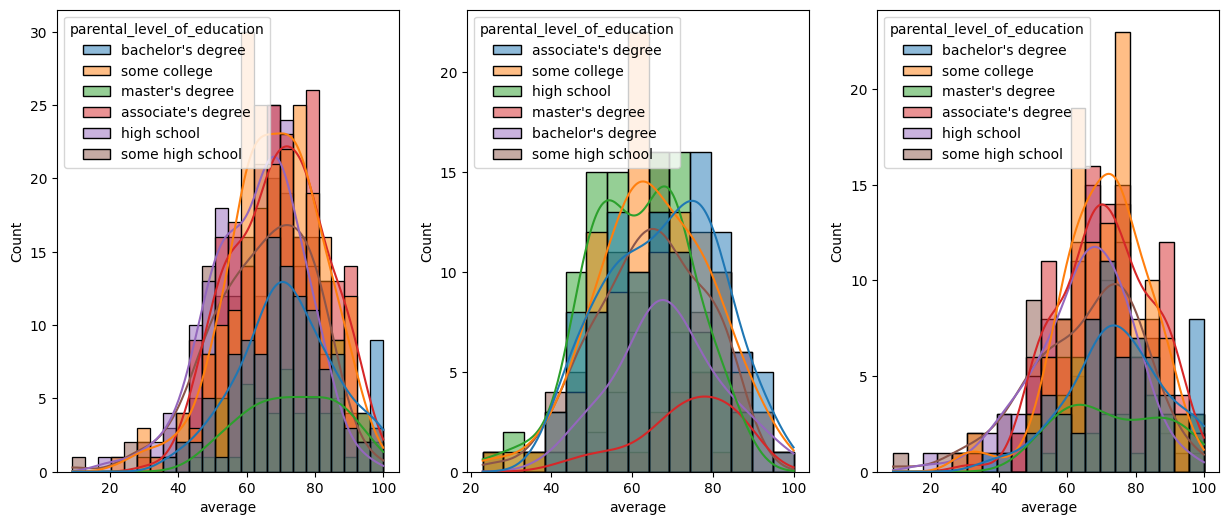

In [ ]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- From 3rd plot we can see there is no effect of parent's education on female students.

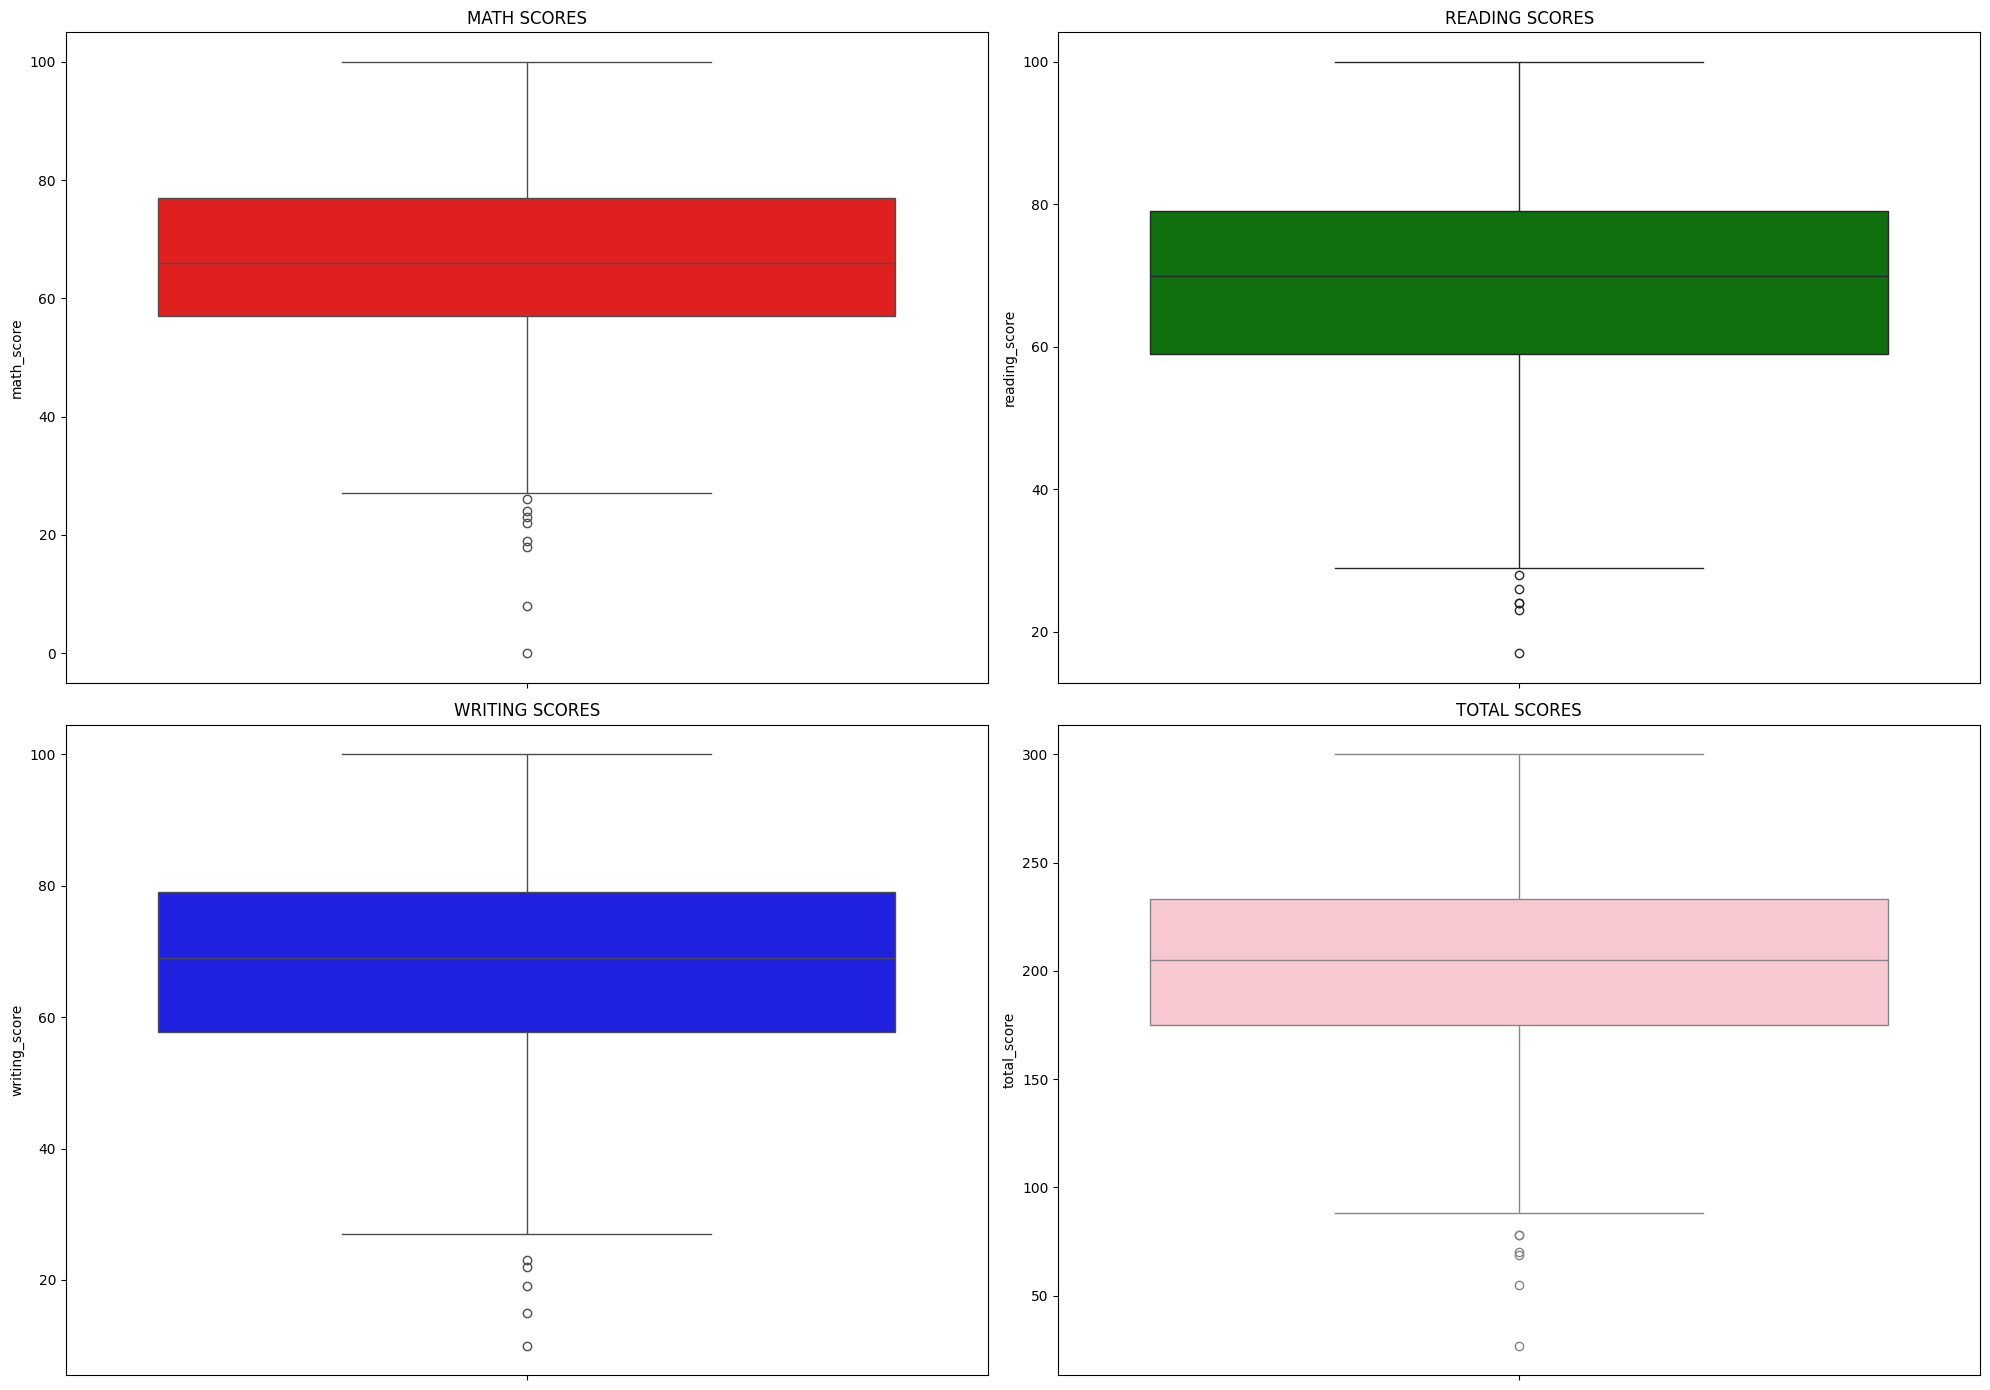

In [ ]:
_, axs = plt.subplots(2,2,figsize=(20,14))
axs=axs.flatten()

axs[0].set_title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red', ax=axs[0])

axs[1].set_title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green', ax=axs[1])

axs[2].set_title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',ax=axs[2])

axs[3].set_title('TOTAL SCORES')
sns.boxplot(y='total_score',data=df,color='pink',ax=axs[3])

plt.tight_layout()

- Its clearly visible that most of the students score in between 55-75 in Maths whereas in reading and writing most of them score from 60-80
- most of the students' total score is in between 170-230

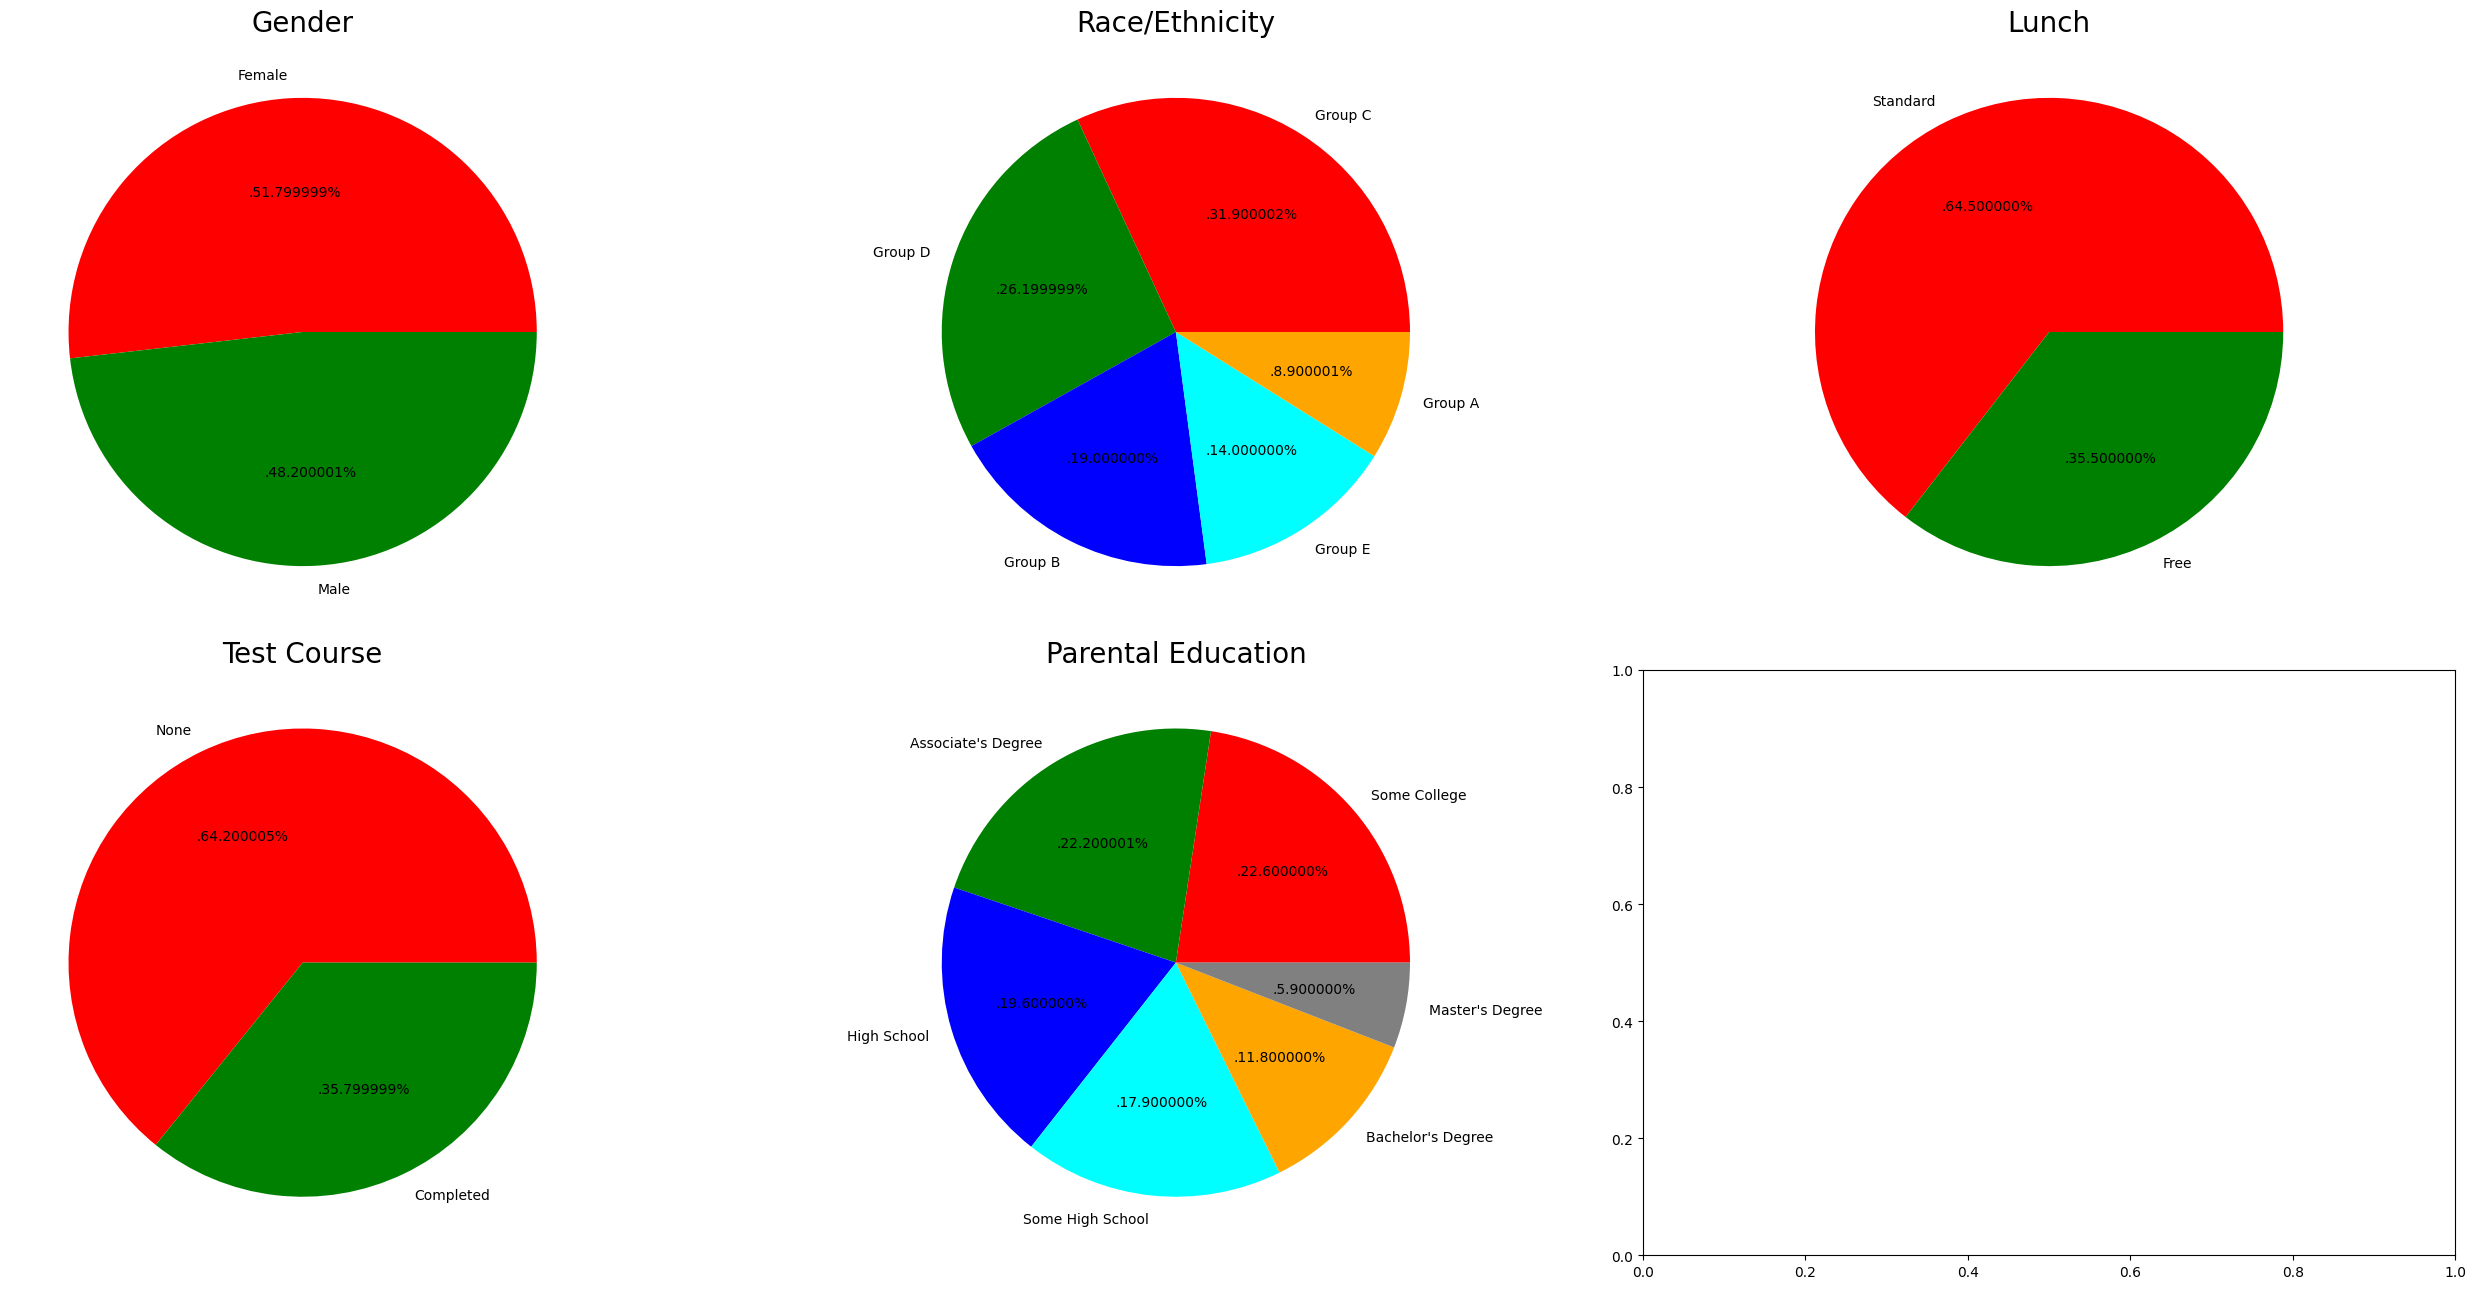

In [ ]:
_, axs = plt.subplots(2,3,figsize=(26,13))
axs=axs.flatten()

size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
axs[0].pie(size, colors = color, labels = labels,autopct = '.%2f%%')
axs[0].set_title('Gender', fontsize = 20)
axs[0].axis('off')

size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
axs[1].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
axs[1].set_title('Race/Ethnicity', fontsize = 20)
axs[1].axis('off')


size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
axs[2].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
axs[2].set_title('Lunch', fontsize = 20)
axs[2].axis('off')

size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
axs[3].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
axs[3].set_title('Test Course', fontsize = 20)
axs[3].axis('off')

size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
axs[4].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
axs[4].set_title('Parental Education', fontsize = 20)
axs[4].axis('off')

plt.tight_layout()


- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

([<matplotlib.patches.Wedge at 0x2c043882240>,
 [Text(0.7000196819483858, 1.0954325378063594, 'group C'),
  Text(-1.188820629713836, 0.38627129115014336, 'group D'),
  Text(-0.5380599473435599, -1.0726096648197077, 'group B'),
  Text(0.6222893077713263, -0.9670863546930458, 'group E'),
  Text(1.0572819245745813, -0.30357030811307883, 'group A')],
 [Text(0.4307813427374682, 0.6741123309577595, '31.90%'),
  Text(-0.7132923778283016, 0.23176277469008602, '26.20%'),
  Text(-0.31386830261707654, -0.6256889711448295, '19.00%'),
  Text(0.3517287391750974, -0.5466140265656345, '14.00%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.90%')])

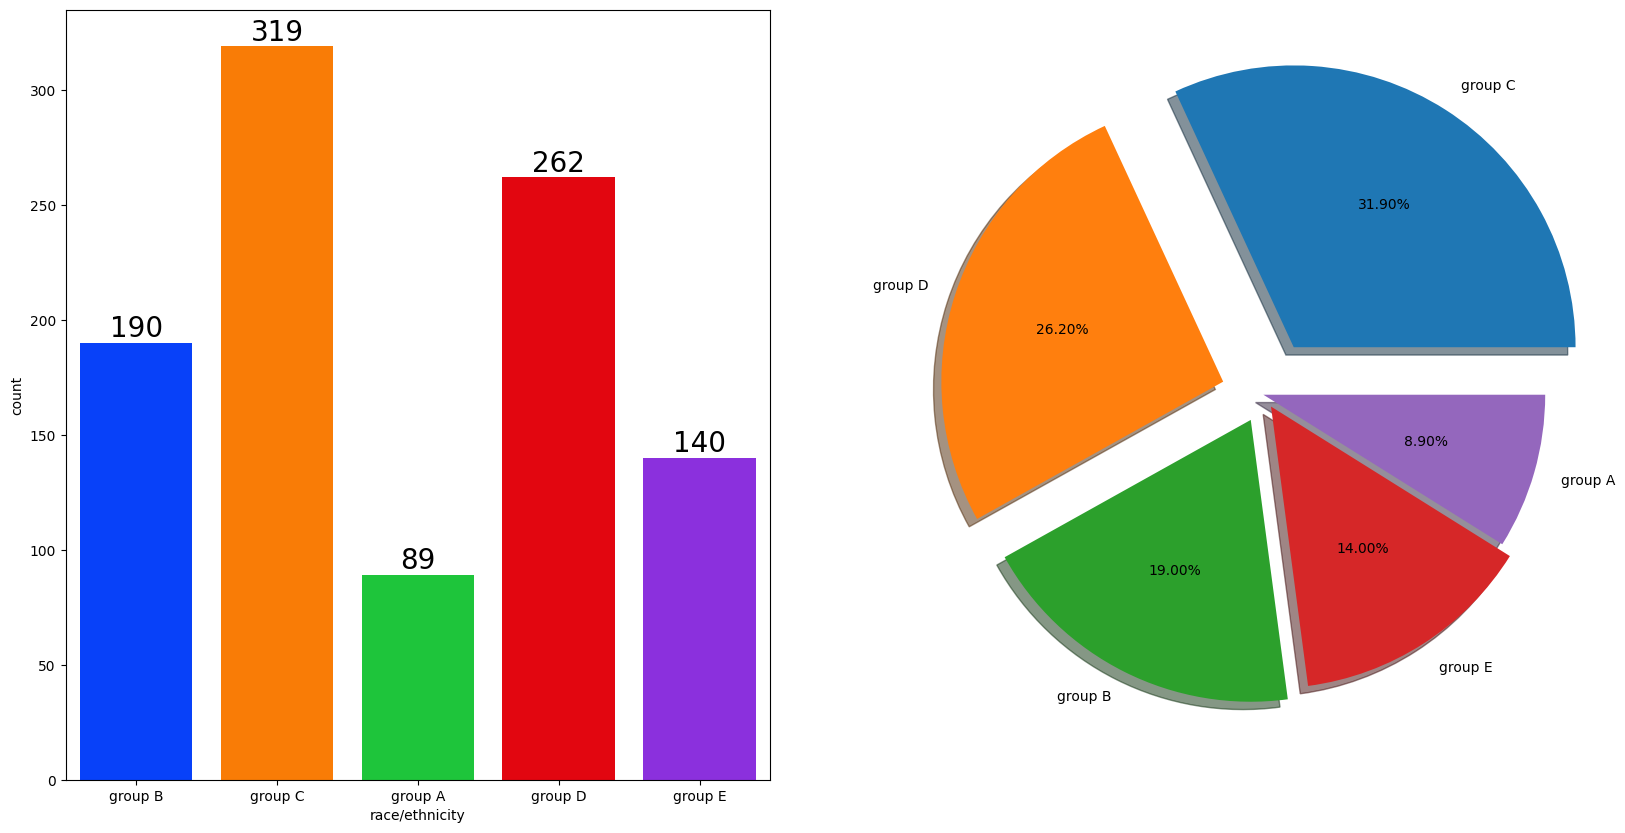

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.2,0.15,0.1,0.05,0],autopct='%1.2f%%',shadow=True)
 

#### CHECKING OUTLIERS

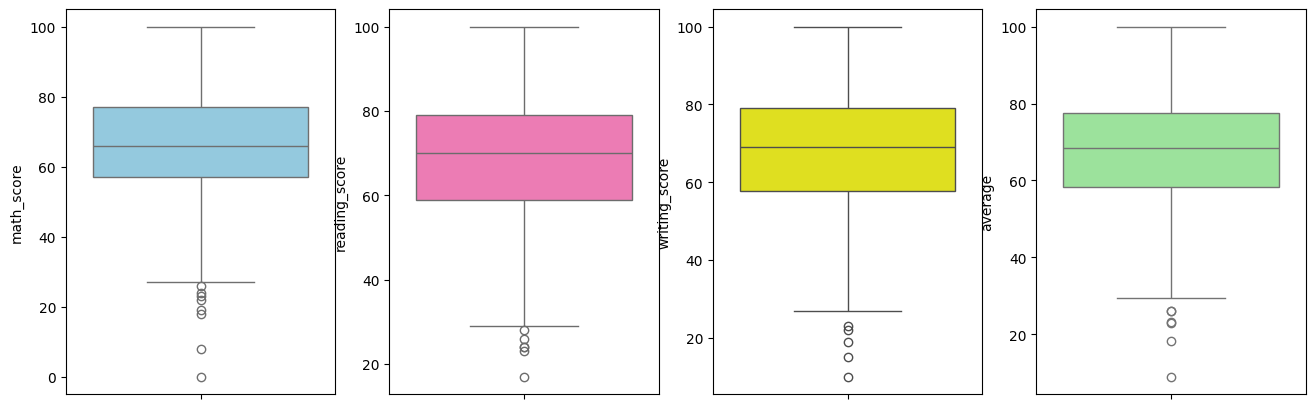

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

- Each score has some outliers and we need to handle them

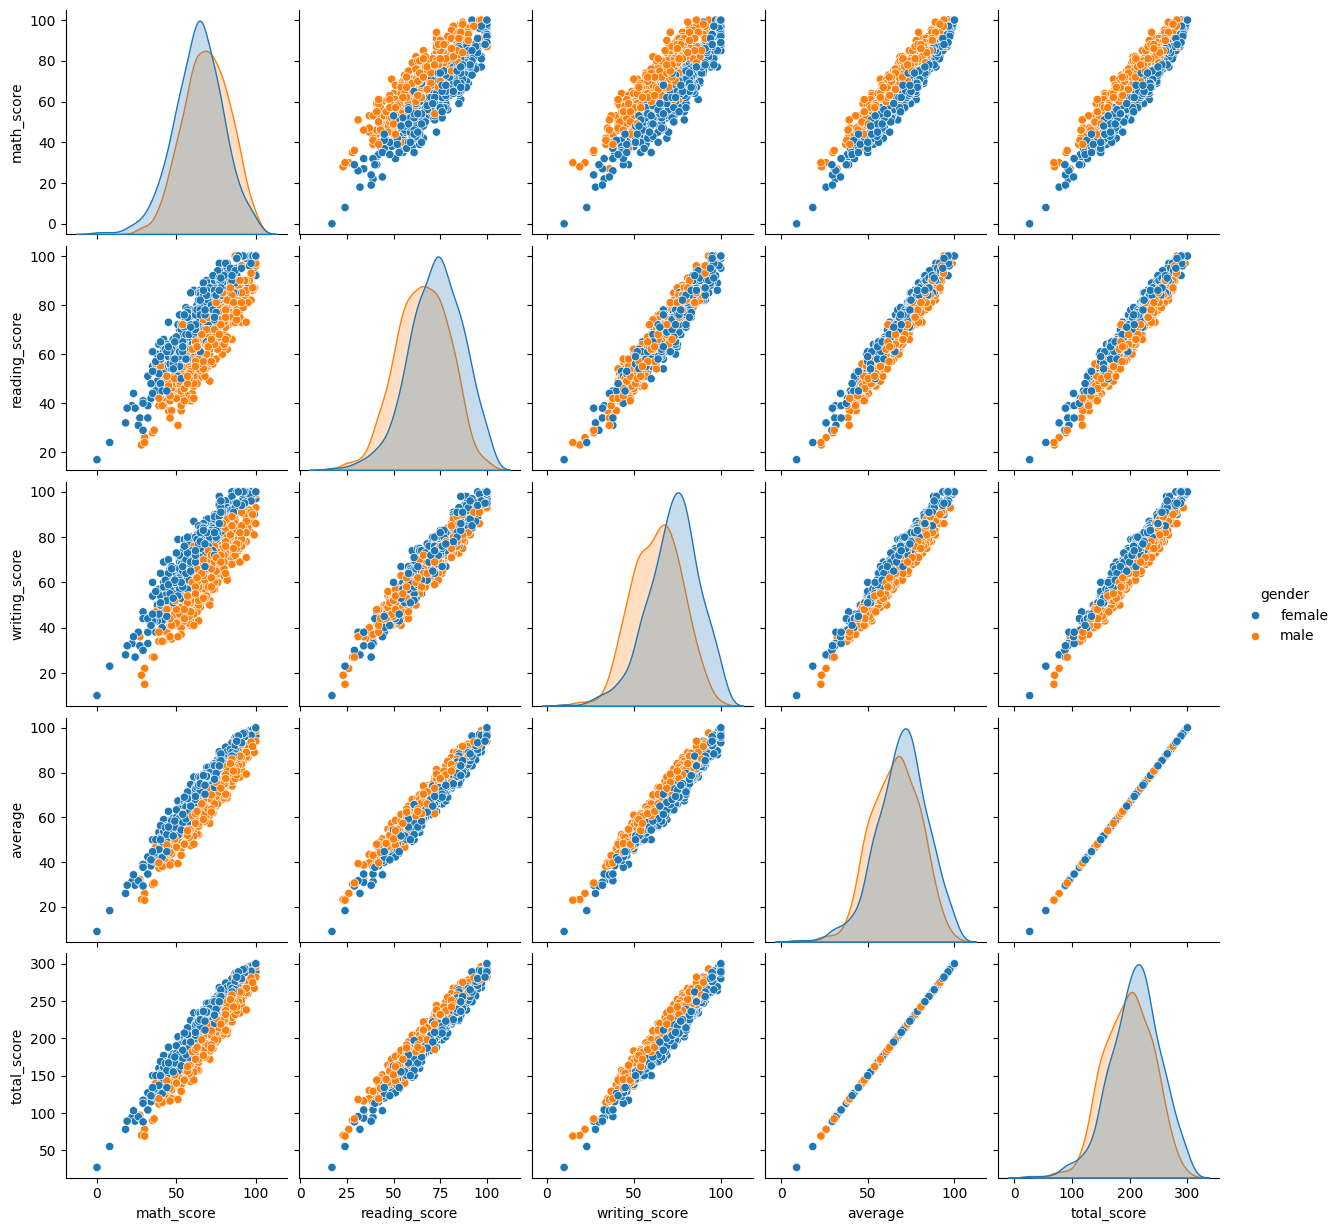

In [ ]:
sns.pairplot(df,hue = 'gender')

- From the above plot it is clear that all the scores increase linearly with each other.

####  Final Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.